In [1]:
import pandas as pd
df = pd.read_excel('./음식분류_AI_데이터_영양DB.xlsx')
df

,음 식 명,중량(g),에너지(kcal),탄수화물(g),당류(g),지방(g),단백질(g),칼슘(mg),인(mg),나트륨(mg),칼륨(mg),마그네슘(mg),철(mg),아연(mg),콜레스테롤(mg),트랜스지방(g)
0,쌀밥,210.0,334.8000,73.71000,0.000000,0.45000,5.76000,3.6,126,59.40000,146.7,-,0.36,1.35,0.000,0
1,기타잡곡밥,200.0,302.3620,65.52110,0.000000,0.74620,6.70920,12.06,117.836,3.39200,166.718,6.9,1.7447,1.8264,0.000,0
2,콩밥,200.0,322.9000,65.84600,0.000000,1.66600,8.42800,24.7,126.9,4.10000,258.4,22.5,1.74,1.61,0.000,0
3,보리밥,200.0,316.1000,70.57000,0.000000,0.14000,5.55000,6.7,68.8,4.50000,100.6,0,1.26,1.41,0.000,0
4,돌솥밥,350.0,528.8550,101.85000,0.000000,8.34700,10.18700,61.455,193.72,618.31500,624.32,57.785,3.321,2.582,2.365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,다식,30.0,105.1665,20.81070,6.455700,1.72860,3.54630,1.4274,100.0665,3.84900,206.7144,-,0.5175,0.0411,0.000,0
396,약과,30.0,113.8494,22.18320,2.151900,1.23870,2.57400,4.449,28.23,16.45980,59.4219,-,0.5661,0.1431,0.000,0
397,유과,30.0,129.0600,24.13650,1.120950,3.50400,0.36090,1.2084,3.6,7.05540,0.0285,-,0.24,0.1968,0.000,0
398,산자,30.0,121.6985,24.70195,10.632825,1.19665,0.91035,2.00165,20.36125,8.01255,60.9266,-,0.4053,0.27195,0.000,0


In [2]:
food = df[["에너지(kcal)","탄수화물(g)","당류(g)","지방(g)","단백질(g)","나트륨(mg)"]]
food

,에너지(kcal),탄수화물(g),당류(g),지방(g),단백질(g),나트륨(mg)
0,334.8000,73.71000,0.000000,0.45000,5.76000,59.40000
1,302.3620,65.52110,0.000000,0.74620,6.70920,3.39200
2,322.9000,65.84600,0.000000,1.66600,8.42800,4.10000
3,316.1000,70.57000,0.000000,0.14000,5.55000,4.50000
4,528.8550,101.85000,0.000000,8.34700,10.18700,618.31500
...,...,...,...,...,...,...
395,105.1665,20.81070,6.455700,1.72860,3.54630,3.84900
396,113.8494,22.18320,2.151900,1.23870,2.57400,16.45980
397,129.0600,24.13650,1.120950,3.50400,0.36090,7.05540
398,121.6985,24.70195,10.632825,1.19665,0.91035,8.01255


## K-means 클러스터링
- 그룹개수 : 4개
- 정규화하기

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
sc = StandardScaler()
food_scaled = sc.fit_transform(food)
pd.DataFrame(food_scaled)

,0,1,2,3,4,5
0,0.015728,0.956585,-0.486210,-0.870927,-0.757888,-1.249143
1,-0.117096,0.729613,-0.486210,-0.847148,-0.700450,-1.321046
2,-0.032999,0.738618,-0.486210,-0.773309,-0.596441,-1.320138
3,-0.060843,0.869554,-0.486210,-0.895813,-0.770596,-1.319624
4,0.810326,1.736545,-0.486210,-0.236971,-0.490000,-0.531600
...,...,...,...,...,...,...
395,-0.924553,-0.509631,0.692304,-0.768283,-0.891844,-1.320460
396,-0.889000,-0.471589,-0.093372,-0.807611,-0.950681,-1.304270
397,-0.826717,-0.417450,-0.281576,-0.625758,-1.084600,-1.316343
398,-0.856860,-0.401777,1.454856,-0.810987,-1.051352,-1.315115


In [5]:
#food_scaled 데이터를 넣어 클러스터링
km = KMeans(n_clusters=10, random_state=0)
clusters = km.fit(food_scaled)

#클러스터링 변수(clusters)를 원본 데이터에 넣기
food['cluster'] = clusters.labels_
food

C:\Users\myreo\anaconda3\envs\pknu_base\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\myreo\AppData\Local\Temp\ipykernel_7628\2310050816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food['cluster'] = clusters.labels_


,에너지(kcal),탄수화물(g),당류(g),지방(g),단백질(g),나트륨(mg),cluster
0,334.8000,73.71000,0.000000,0.45000,5.76000,59.40000,8
1,302.3620,65.52110,0.000000,0.74620,6.70920,3.39200,8
2,322.9000,65.84600,0.000000,1.66600,8.42800,4.10000,8
3,316.1000,70.57000,0.000000,0.14000,5.55000,4.50000,8
4,528.8550,101.85000,0.000000,8.34700,10.18700,618.31500,5
...,...,...,...,...,...,...,...
395,105.1665,20.81070,6.455700,1.72860,3.54630,3.84900,9
396,113.8494,22.18320,2.151900,1.23870,2.57400,16.45980,3
397,129.0600,24.13650,1.120950,3.50400,0.36090,7.05540,3
398,121.6985,24.70195,10.632825,1.19665,0.91035,8.01255,9


## 클러스터링 결과 분석

In [6]:
food.groupby('cluster').count()
### -> 196번 찜닭(인덱스 : 194) => cluster '6'

,에너지(kcal),탄수화물(g),당류(g),지방(g),단백질(g),나트륨(mg)
cluster,,,,,,
0,16,16,16,16,16,16
1,54,54,54,54,54,54
2,47,47,47,47,47,47
3,86,86,86,86,86,86
4,39,39,39,39,39,39
5,47,47,47,47,47,47
6,1,1,1,1,1,1
7,11,11,11,11,11,11
8,64,64,64,64,64,64


In [7]:
#차원 축소
from sklearn.decomposition import PCA
X = food_scaled.copy()

pca = PCA(n_components=2)

pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-9.15538694e-01,  4.92055180e-01],
       [-1.06282188e+00,  3.58182342e-01],
       [-9.33840896e-01,  2.99605027e-01],
       [-1.03321079e+00,  4.59375999e-01],
       [ 4.74240835e-01,  5.59755851e-01],
       [-7.97433795e-01,  4.99922265e-01],
       [-1.02669933e+00,  4.47537327e-01],
       [-1.06893012e+00,  4.37080372e-01],
       [ 3.36199492e-01,  4.74362950e-01],
       [ 7.22289435e-01,  1.01917795e+00],
       [-1.31572809e+00, -3.33672549e-02],
       [ 1.99698912e+00,  5.91607882e-02],
       [ 2.11566560e+00,  1.88587019e-01],
       [ 1.42129174e+00,  7.42945077e-01],
       [ 1.88317865e+00,  9.80773022e-01],
       [ 1.57423363e+00, -4.75561957e-02],
       [ 1.04420757e+00,  7.58124225e-01],
       [ 6.13827733e-01,  4.58663623e-01],
       [ 1.82187633e+00,  1.19017160e-02],
       [ 1.91753445e+00,  1.80690650e-01],
       [ 1.62772721e+00, -3.70409713e-01],
       [ 1.71755120e-01,  8.24022899e-01],
       [ 2.17651844e+00,  5.13541082e-01],
       [ 1.

In [8]:
# x_pca를 numpy -> Dataframe으로
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = food["cluster"]
pca_df.head(10)

,0,1,cluster
0,-0.915539,0.492055,8
1,-1.062822,0.358182,8
2,-0.933841,0.299605,8
3,-1.033211,0.459376,8
4,0.474241,0.559756,5
5,-0.797434,0.499922,8
6,-1.026699,0.447537,8
7,-1.068930,0.437080,8
8,0.336199,0.474363,5
9,0.722289,1.019178,5


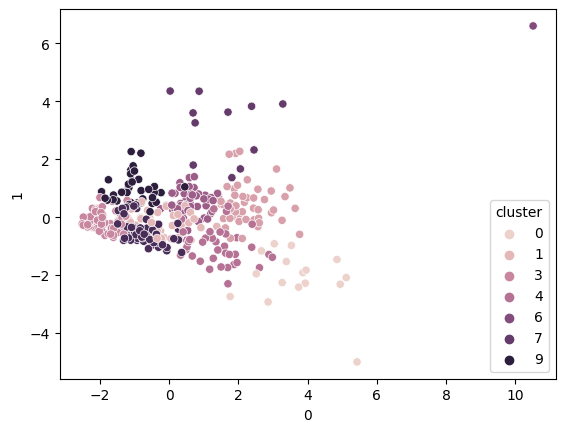

In [9]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(x=0,y=1,hue='cluster',data=pca_df)

## 클러스터링 결과 재정리

In [ ]:
### 30일 때 복사본 ( 길이 맞춰서 좀 바꾸기)
['떡갈비', '소양념갈비구이', '훈제오리']
['달걀국', '미역국', '바지락조개국', '소고기무국', '오징어국', '황태해장국', '근대된장국', '시금치된장국', '시래기된장국', '아욱된장국', '곰탕', '육개장', '소고기전골','버섯찌개', '순두부찌개', '콩비지찌개', '햄김치찌개', '호박찌개', '도미찜', '조기찜', '달걀찜', '가자미전', '북어조림', '상추겉절이', '오징어무침', '육사시미', '탕국', '미소된장국', '콩나물국', ]
['볶음밥', '일반비빔밥', '삼선볶음밥', '새우볶음밥', '오므라이스', '육회비빔밥', '해물볶음밥', '불고기덮밥', '오징어덮밥', '자장밥', '잡탕밥', '장어덮밥', '제육덮밥', '새우튀김롤', '오일소스스파게티', '크림소스스파게티', '토마토소스스파게티', '군만두', '잣죽', '참치죽', '국수전골']
['문어숙회', '참꼬막', '양배추구이', '두부구이', '건새우볶음', '멸치볶음', '오징어채볶음', '감자볶음', '호박볶음', '갈치조림', '돼지고기메추리알장조림', '소고기메추리알장조림', '감자조림', '알감자조림', '(검은)콩조림', '콩조림', '두부고추장조림', '땅콩조림', '단무지무침', '도토리묵', '마늘쫑무침', '무말랭이', '오이생채', '쑥갓나물무침', '가지나물', '고사리나물', '도라지나물', '무나물', '미나리나물', '숙주나물', '시금치나물', '취나물', '콩나물', '고구마줄기나물', '미역초무침', '파래무침', '갓김치', '고들빼기', '깍두기', '나박김치', '배추겉절이', '배추김치', '백김치', '부추김치', '열무김치', '열무얼갈이김치', '오이소박이', '총각김치', '파김치', '마늘쫑장아찌', '고추장아찌', '깻잎장아찌', '마늘장아찌', '무장아찌', '양파장아찌', '오이지', '무피클', '오이피클', '단무지', '오징어젓갈', '명란젓', '생연어', '매작과', '약과', '유과']
['더덕무침', '회무침', '양념게장', '생선물회']
['소곱창구이', '양념왕갈비', '치킨데리야끼', '소세지볶음', '오리불고기', '생선가스', '돈가스', '양념치킨', '치즈돈가스', '치킨가스', '깐풍기']
['짬뽕밥', '해물덮밥', '기스면', '닭칼국수', '삼선우동', '삼선자장면', '삼선짬뽕', '짬뽕', '짬뽕라면']
['농어초밥', '문어초밥', '새우초밥', '광어초밥', '연어초밥', '유부초밥', '한치초밥', '팥죽', '떡볶이']
['미역오이냉국', '소불고기', '낙지볶음', '어묵볶음', '오징어볶음', '주꾸미볶음', '김치볶음', '고추잡채', '라볶이', '홍어무침', '훈제연어', '육회']
['김치말이국수', '쌀국수', '굴국', '김치국', '감자국', '소고기미역국', '어묵국', '홍합미역국', '배추된장국', '쑥된장국', '우거지된장국', '우거지해장국', '우렁된장국', '갈비탕', '낙지탕', '된장찌개', '청국장찌개', '돼지고기김치찌개', '참치김치찌개', '깻잎김치', '동치미']
['토마토스프', '닭볶음탕', '꽁치찌개', '두부전골', '고추장찌개', '돼지갈비찜', '족발', '돼지갈비', '불고기', '햄버거스테이크', '삼치구이', '동태전', '동그랑땡', '깻잎전', '두부전', '두부김치', '돼지고기볶음', '오삼불고기', '꽁치조림', '닭강정', '모래집튀김']
['쌀밥', '기타잡곡밥', '콩밥', '보리밥', '현미밥', '흑미밥', '감자밥', '주먹밥', '갈비삼각김밥', '참치마요삼각김밥', '도라지생채', '잡채', '가래떡', '경단', '시루떡', '찰떡', '송편', '수수부꾸미', '수수팥떡', '인절미', '절편']
['콩국수', '순대국', '닭곰탕', '도가니탕', '설렁탕', '오리탕', '곱창전골', '소갈비찜', '닭갈비', '고등어조림']
['돌솥밥', '곤드레밥', '김치볶음밥', '산채비빔밥 ', '열무비빔밥', '하이라이스', '김치김밥', '샐러드김밥', '치즈김밥 ', '일반김밥', '토란국', '고구마맛탕']
['뼈다귀해장국 ', '감자탕', '내장탕', '뼈해장국', '고등어찌개']
['선지(해장)국', '매운탕', '꽃게탕', '지리탕', '추어탕', '해물탕', '닭개장', '동태찌개', '대구찜', '아귀찜', '해물찜', '해물볶음', '가자미조림', '동태조림', '조기조림', '간장게장']
['소머리국밥', '돼지국밥', '닭죽', '꼬리곰탕', '삼계탕', '닭튀김']
['더덕구이', '달래나물무침', '청포묵무침', '꿀떡', '무지개떡', '백설기', '쑥떡', '약식', '증편', '찹쌀떡', '산자']
['전주비빔밥', '알밥', '소고기국밥', '송이덮밥', '카레라이스', '전주콩나물국밥', '소고기김밥', '연어롤 ', '장어초밥', '캘리포니아롤', '들깨칼국수', '라면', '비빔냉면', '일식우동', '볶음우동', '짜장라면', '게살죽', '깨죽', '소고기버섯죽', '어죽', '전복죽', '채소죽']
['알탕', '돼지껍데기볶음', '북어채무침']
['참치김밥', '고기만두', '김치만두', '콘스프', '감자전', '김치전', '미꾸라지튀김', '새우튀김', '쥐포튀김', '오징어튀김', '탕수육', '감자튀김', '채소튀김', '골뱅이국수무침']
['회덮밥', '쫄면', '회냉면', '호박죽']
['막국수', '메밀국수', '비빔국수', '순대볶음']
['잡채밥', '간자장', '자장면']
['돼지고기수육']
['물만두', '치킨윙', '굴전', '해물파전', '햄부침', '육전', '고추전', '녹두빈대떡', '미나리전', '배추전', '버섯전', '부추전', '야채전', '파전', '호박부침개', '호박전', '달걀말이', '두부부침', '깻잎나물볶음', '느타리버섯볶음', '머위나물볶음', '양송이버섯볶음', '표고버섯볶음', '마파두부', '코다리조림', '메추리알장조림', '고구마튀김', '고추튀김', '김말이튀김', '우거지나물무침', '메밀전병', '깨강정']
['닭꼬치', '달걀장조림', '고추조림', '우엉조림', '노각무침', '무생채', '파무침', '해파리냉채', '골뱅이무침', '김무침', '쥐치채', '탕평채', '광어회 ', '다식']
['굴짬뽕', '김치우동', '떡라면', '물냉면', '수제비', '열무김치국수', '잔치국수', '해물칼국수', '떡국', '떡만둣국']
['연포탕']
['순대국밥', '김치라면', '치즈라면', '만둣국', '부대찌개']

# 1차 클러스터링

In [57]:
import pandas as pd
df = pd.read_excel('./음식분류_AI_데이터_영양DB.xlsx')
food = df[["에너지(kcal)","탄수화물(g)","당류(g)","지방(g)","단백질(g)","나트륨(mg)"]]
foodie = df[["음 식 명"]]
lili = foodie["음 식 명"]

### 찜닭 빼기
lili1 = lili[:194]
lili2 = lili[195:]
foodie_list = lili1.append(lili2)
foodie_df=pd.DataFrame(foodie_list)
foodie_df=foodie_df.reset_index(drop=True)
foodie_list = foodie_df["음 식 명"].to_list()

### 찜닭 빼고 클러스터링하기
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
food_scaled = sc.fit_transform(food)
pd.DataFrame(food_scaled)
df1=pd.DataFrame(food_scaled[:194])
df2=pd.DataFrame(food_scaled[195:])
food_scaled=pd.concat([df1,df2],axis=0)
food_scaled.reset_index(drop=True)

C:\Users\myreo\AppData\Local\Temp\ipykernel_1920\1921173139.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  foodie_list = lili1.append(lili2)


,0,1,2,3,4,5
0,0.015728,0.956585,-0.486210,-0.870927,-0.757888,-1.249143
1,-0.117096,0.729613,-0.486210,-0.847148,-0.700450,-1.321046
2,-0.032999,0.738618,-0.486210,-0.773309,-0.596441,-1.320138
3,-0.060843,0.869554,-0.486210,-0.895813,-0.770596,-1.319624
4,0.810326,1.736545,-0.486210,-0.236971,-0.490000,-0.531600
...,...,...,...,...,...,...
394,-0.924553,-0.509631,0.692304,-0.768283,-0.891844,-1.320460
395,-0.889000,-0.471589,-0.093372,-0.807611,-0.950681,-1.304270
396,-0.826717,-0.417450,-0.281576,-0.625758,-1.084600,-1.316343
397,-0.856860,-0.401777,1.454856,-0.810987,-1.051352,-1.315115


In [95]:
#food_scaled 데이터를 넣어 클러스터링
food_scaled.columns = food_scaled.columns.astype(str)
km = KMeans(n_clusters=20, random_state=42)
clusters = km.fit(food_scaled)

#클러스터링 변수(clusters)를 원본 데이터에 넣기
food_scaled['cluster'] = clusters.labels_
food_scaled = food_scaled.reset_index(drop=True)

# 클러스터 정보
from sklearn.decomposition import PCA
X = food_scaled.copy()
pca = PCA(n_components=3)
pca.fit(X)
x_pca = pca.transform(X)
x_pca

# 데이터프레임 클러스터 열에 클러스터 정보 넣기
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = food_scaled["cluster"]
pca_df.loc[192]

entire_list = []
for i in range(pca_df["cluster"].nunique()):
    cluster_idx = pca_df[pca_df["cluster"] == i].index.tolist()
    cluster_items = [foodie_list[idx] for idx in cluster_idx]
    entire_list.append(cluster_items)

C:\Users\myreo\anaconda3\envs\pknu_base\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [96]:
# 클러스터링된 군집끼리 리스트 보기
for j in range(0,20,1):
    print(entire_list[j])

for k in range(0,20,1) :
    print(len(entire_list[k]))

['미역오이냉국', '닭꼬치', '소불고기', '더덕구이', '낙지볶음', '오징어볶음', '주꾸미볶음', '김치볶음', '고추잡채', '돼지껍데기볶음', '떡볶이', '라볶이', '우엉조림', '달래나물무침', '파무침', '청포묵무침', '해파리냉채', '골뱅이무침', '김무침', '홍어무침', '탕평채', '광어회 ', '육회', '꿀떡', '시루떡', '찰떡', '무지개떡', '백설기', '쑥떡', '약식', '절편', '증편', '찹쌀떡', '다식', '산자']
['물만두', '탕국', '미소된장국', '콩나물국', '호박찌개', '문어숙회', '참꼬막', '양배추구이', '두부구이', '호박부침개', '두부부침', '건새우볶음', '멸치볶음', '오징어채볶음', '감자볶음', '느타리버섯볶음', '머위나물볶음', '양송이버섯볶음', '표고버섯볶음', '호박볶음', '갈치조림', '코다리조림', '달걀장조림', '돼지고기메추리알장조림', '소고기메추리알장조림', '고추조림', '감자조림', '알감자조림', '(검은)콩조림', '콩조림', '두부고추장조림', '땅콩조림', '노각무침', '단무지무침', '도토리묵', '마늘쫑무침', '무생채', '무말랭이', '오이생채', '상추겉절이', '쑥갓나물무침', '가지나물', '고사리나물', '도라지나물', '무나물', '미나리나물', '숙주나물', '시금치나물', '취나물', '콩나물', '고구마줄기나물', '우거지나물무침', '미역초무침', '쥐치채', '파래무침', '갓김치', '고들빼기', '깍두기', '나박김치', '배추겉절이', '배추김치', '백김치', '부추김치', '열무김치', '열무얼갈이김치', '오이소박이', '총각김치', '파김치', '마늘쫑장아찌', '고추장아찌', '깻잎장아찌', '마늘장아찌', '무장아찌', '양파장아찌', '오이지', '무피클', '오이피클', '단무지', '오징어젓갈', '명란젓', '생연어', '매작과', '약과', '유과', '깨강정']
['오징어덮밥', '자

In [97]:
# 클러스터링 결과분석
food_scaled.groupby('cluster').count()

,0,1,2,3,4,5
cluster,,,,,,
0,35,35,35,35,35,35
1,85,85,85,85,85,85
2,16,16,16,16,16,16
3,19,19,19,19,19,19
4,15,15,15,15,15,15
5,4,4,4,4,4,4
6,3,3,3,3,3,3
7,6,6,6,6,6,6
8,42,42,42,42,42,42


# 2차 클러스터링

In [98]:
import pandas as pd
df = pd.read_excel('./음식분류_AI_데이터_영양DB.xlsx')
food = df[["음 식 명","에너지(kcal)","탄수화물(g)","당류(g)","지방(g)","단백질(g)","나트륨(mg)"]]

# 0~9번 해야함(3,5 제외)
#0:85, 1:60, 2:29, 3:60, 4:32, 5:35, 6:52, 7:10, 8:15, 9:21
list_2 = entire_list[1]

index_list = []
for val in list_2 :
    index = food[food['음 식 명'] == '{}'.format(val)].index
    #print(index)
    index_list.append(index)
    
result = [i[0] for i in index_list]
result

# 데이터프레임 새로 만들기
df_2 = food.iloc[result]
df_2
food_2 = df_2[["에너지(kcal)","탄수화물(g)","당류(g)",
                 "지방(g)","단백질(g)","나트륨(mg)"]]
food_2

,에너지(kcal),탄수화물(g),당류(g),지방(g),단백질(g),나트륨(mg)
100,158.05255,20.48495,0.00000,5.8420,5.8581,269.51975
127,94.23750,2.57500,0.00000,4.3200,12.0775,663.04750
131,37.96650,1.69500,0.00000,1.7460,4.1385,511.98000
135,22.53000,1.26100,0.00000,1.4220,1.8220,752.42500
182,98.30100,12.73500,2.06400,2.3370,7.7790,1028.14500
...,...,...,...,...,...,...
371,110.29000,1.00200,0.00000,1.9380,20.9080,213.06000
394,121.47750,19.06290,0.00000,3.5703,2.5542,31.04580
396,113.84940,22.18320,2.15190,1.2387,2.5740,16.45980
397,129.06000,24.13650,1.12095,3.5040,0.3609,7.05540


In [99]:
### 클러스터링
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
food_scaled_2 = sc.fit_transform(food_2)
df_2=pd.DataFrame(food_scaled_2)
df_2.reset_index(drop=True)

# KMeans 모델 학습 및 클러스터링
km = KMeans(n_clusters=3, random_state=0)
clusters = km.fit(df_2)

#클러스터링 변수(clusters)를 원본 데이터에 넣기
df_2['cluster'] = clusters.labels_
df_2 = df_2.reset_index(drop=True)
df_2

# 클러스터 정보
from sklearn.decomposition import PCA
X_2 = df_2.copy()
pca_2 = PCA(n_components=2)
pca_2.fit(X)
x_pca_2 = pca_2.transform(X)

# 데이터프레임 클러스터 열에 클러스터 정보 넣기
pca_df_2 = pd.DataFrame(x_pca_2)
pca_df_2["cluster"] = df_2["cluster"]
pca_df_2.loc[192]

entire_list_2 = []
for i in range(pca_df_2["cluster"].nunique()):
    cluster_idx = pca_df_2[pca_df_2["cluster"] == i].index.tolist()
    cluster_items = [foodie_list[idx] for idx in cluster_idx]
    entire_list_2.append(cluster_items)

C:\Users\myreo\anaconda3\envs\pknu_base\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [100]:
# 클러스터링된 군집끼리 리스트 보기
for j in range(0,3,1):
    print(entire_list_2[j])

for k in range(0,3,1) :
    print(len(entire_list_2[k]))

['돌솥밥', '볶음밥', '일반비빔밥', '오징어덮밥', '잡채밥', '잡탕밥', '장어덮밥', '짬뽕밥', '순대국밥', '해물덮밥', '회덮밥', '장어초밥', '참치김밥', '김치라면', '라면', '막국수', '메밀국수', '비빔국수', '삼선짬뽕', '볶음우동']
['쌀밥', '기타잡곡밥', '흑미밥', '곤드레밥', '김치볶음밥', '주먹밥', '새우볶음밥', '알밥', '산채비빔밥 ', '오므라이스', '해물볶음밥', '열무비빔밥', '불고기덮밥', '하이라이스', '김치김밥', '유부초밥', '오일소스스파게티', '일식우동', '자장면', '잔치국수']
['콩밥', '보리밥', '현미밥', '감자밥', '전주비빔밥', '삼선볶음밥', '육회비빔밥', '소고기국밥', '송이덮밥', '자장밥', '제육덮밥', '카레라이스', '전주콩나물국밥', '소머리국밥', '돼지국밥', '농어초밥', '문어초밥', '새우초밥', '새우튀김롤', '샐러드김밥', '광어초밥', '소고기김밥', '갈비삼각김밥', '연어롤 ', '연어초밥', '참치마요삼각김밥', '치즈김밥 ', '캘리포니아롤', '한치초밥', '일반김밥', '간자장', '굴짬뽕', '기스면', '김치우동', '김치말이국수', '닭칼국수', '들깨칼국수', '떡라면', '물냉면', '비빔냉면', '삼선우동', '삼선자장면', '수제비', '쌀국수', '열무김치국수']
20
20
45


# 결과 정리

In [118]:
wow = [['미역오이냉국', '닭꼬치', '소불고기', '더덕구이', '낙지볶음', '오징어볶음', '주꾸미볶음', '김치볶음', '고추잡채', '잡채', '돼지껍데기볶음', '떡볶이', '라볶이', '우엉조림', '달래나물무침', '파무침', '청포묵무침', '해파리냉채', '골뱅이무침', '김무침', '홍어무침', '탕평채', '광어회 ', '육회']
,['꿀떡', '시루떡', '찰떡', '무지개떡', '백설기', '쑥떡', '약식', '절편', '증편', '찹쌀떡', '다식', '산자', '가래떡', '경단', '메밀전병', '송편', '수수부꾸미', '수수팥떡', '인절미']
,['돌솥밥', '볶음밥', '일반비빔밥',  '전주비빔밥', '삼선볶음밥', '육회비빔밥', '소고기국밥', '송이덮밥', '자장밥', '제육덮밥', '오징어덮밥', '잡채밥', '잡탕밥', '장어덮밥', '짬뽕밥', '순대국밥', '해물덮밥', '회덮밥', '장어초밥', '참치김밥','오징어덮밥', '자장밥', '잡채밥', '잡탕밥', '제육덮밥', '짬뽕밥', '해물덮밥']
,['쌀밥', '기타잡곡밥', '흑미밥', '곤드레밥', '김치볶음밥', '주먹밥', '새우볶음밥', '알밥', '산채비빔밥 ', '오므라이스', '해물볶음밥', '열무비빔밥', '불고기덮밥', '하이라이스', '김치김밥', '유부초밥']
,['콩밥', '보리밥', '현미밥', '감자밥', '카레라이스', '전주콩나물국밥', '소머리국밥', '돼지국밥', '농어초밥', '문어초밥', '새우초밥', '새우튀김롤', '샐러드김밥', '광어초밥', '소고기김밥', '갈비삼각김밥', '연어롤 ', '연어초밥', '참치마요삼각김밥', '치즈김밥 ', '캘리포니아롤', '한치초밥', '일반김밥']
,['간자장', '닭칼국수', '들깨칼국수', '물냉면', '비빔냉면', '삼선우동', '삼선자장면', '수제비', '쌀국수', '들깨칼국수', '막국수', '비빔냉면', '일식우동', '볶음우동', '잔치국수', '짜장라면', '라면', '막국수', '메밀국수', '볶음우동',  '오일소스스파게티', '일식우동', '자장면', '잔치국수', '간자장', '기스면', '닭칼국수', '삼선우동', '삼선자장면', '수제비', '자장면', '국수전골']
,['굴짬뽕', '기스면', '김치우동', '김치말이국수','열무김치국수', '김치라면', '비빔국수', '삼선짬뽕',  '짬뽕라면',  '떡라면', '김치말이국수', '라면']
,['콘스프', '달걀국', '소고기무국', '육개장', '소고기전골', '버섯찌개', '순두부찌개', '콩비지찌개', '고추장찌개', '도미찜', '돼지갈비찜', '달걀찜', '가자미전', '어묵볶음', '두부김치', '북어조림', '오징어무침', '훈제연어', '육사시미']
,['토마토스프', '닭볶음탕', '꽁치찌개', '족발', '불고기', '양념왕갈비', '햄버거스테이크', '삼치구이', '깻잎전', '돼지고기볶음', '소세지볶음', '순대볶음', '오삼불고기', '모래집튀김', '양념치킨', '깐풍기', '닭튀김']
,['돌솥밥', '곤드레밥', '김치볶음밥', '알밥', '산채비빔밥 ', '열무비빔밥', '카레라이스', '하이라이스', '고기만두', '김치만두', '토란국', '고구마맛탕']
,['광어초밥', '소고기김밥', '연어롤 ', '연어초밥', '유부초밥', '장어초밥', '치즈김밥 ', '캘리포니아롤', '한치초밥', '농어초밥', '문어초밥', '새우초밥', '샐러드김밥', '김치김밥']
,['참치김밥', '곰탕', '조기찜', '돼지갈비', '치킨윙', '동그랑땡', '햄부침', '달걀말이', '깻잎나물볶음', '꽁치조림', '메추리알장조림', '미꾸라지튀김', '새우튀김', '쥐포튀김', '오징어튀김', '닭강정', '탕수육', '감자튀김', '고추튀김', '채소튀김', '치즈돈가스', '고구마튀김', '김말이튀김']
,['굴전', '동태전', '해물파전', '육전', '고추전', '김치전', '녹두빈대떡', '버섯전', '호박전', '감자전', '미나리전', '배추전', '부추전', '야채전', '파전', '두부전']
,['소고기국밥', '소머리국밥', '선지(해장)국', '돼지국밥', '쌀국수', '굴국', '감자국', '바지락조개국', '소고기미역국', '어묵국', '오징어국', '홍합미역국', '황태해장국', '우렁된장국', '뼈다귀해장국 ', '내장탕', '뼈해장국', '꼬리곰탕', '고등어찌개', '갈비탕', '꽃게탕', '낙지탕', '청국장찌개', '두부전골', '돼지고기김치찌개', '참치김치찌개',  '감자탕', '삼계탕']
,['쌀밥', '기타잡곡밥', '콩밥', '보리밥', '현미밥', '흑미밥', '감자밥', '주먹밥', '갈비삼각김밥', '참치마요삼각김밥', '일반김밥', '잣죽', '참치죽', '호박죽', '게살죽', '깨죽', '소고기버섯죽', '닭죽', '어죽', '전복죽', '채소죽', '팥죽']
,['순대국밥', '전주콩나물국밥','굴짬뽕', '김치라면', '김치우동', '떡라면', '메밀국수', '물냉면', '삼선짬뽕', '열무김치국수', '짬뽕', '치즈라면', '해물칼국수', '떡국', '떡만둣국', '만둣국', '부대찌개']
,['매운탕', '지리탕', '알탕', '연포탕', '오리탕', '추어탕', '해물탕', '닭개장', '동태찌개', '대구찜', '아귀찜', '해물찜', '해물볶음', '가자미조림', '동태조림', '조기조림', '찜닭']
,['콩국수', '순대국', '닭곰탕', '도가니탕', '설렁탕', '곱창전골', '소갈비찜', '닭갈비', '치킨데리야끼', '오리불고기', '고등어조림', '생선가스', '돈가스', '치킨가스', '돼지고기수육', '떡갈비', '소곱창구이', '소양념갈비구이', '훈제오리']
,['쫄면', '회냉면', '회덮밥', '더덕무침', '회무침', '양념게장', '생선물회','간장게장','북어채무침', '도라지생채', '골뱅이국수무침', '마파두부']
,['볶음밥', '일반비빔밥', '전주비빔밥', '삼선볶음밥', '새우볶음밥', '오므라이스', '육회비빔밥', '해물볶음밥', '불고기덮밥', '송이덮밥', '장어덮밥', '새우튀김롤', '비빔국수', '오일소스스파게티', '토마토소스스파게티','크림소스스파게티', '군만두']
,['김치국', '미역국', '근대된장국', '배추된장국', '시금치된장국', '시래기된장국', '쑥된장국', '아욱된장국', '우거지된장국', '우거지해장국', '된장찌개', '햄김치찌개', '깻잎김치', '동치미']]